In [32]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from collections import Counter
%matplotlib inline

In [33]:
dataset = Dataset("data/Scalograms", batch_size=20)

In [36]:
trainX = dataset.train_data
trainY = dataset.train_labels


tx = dataset.test_data
ty = dataset.test_labels

#Flatten data for test images as a vector and labels as numbers
flattenDataset =np.nan_to_num( np.array([image.flatten() for image in trainX]))
flatTest =np.nan_to_num( np.array([image.flatten() for image in tx]))
fTrainLabels = np.where(trainY == 1)[1]
fTestLabels = np.where(ty == 1)[1]

Distribution class for train  Counter({1: 53, 0: 28})
Pca with 5 components explained variance [ 0.19029568  0.10156499]
PCA 2 comp of the data (using train)


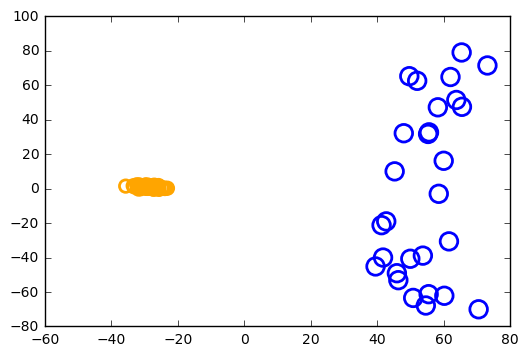

In [37]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)




#Show a few statistics of the data
print "Distribution class for train ",Counter(fTrainLabels)
pca.fit(flattenDataset)
print  "Pca with 5 components explained variance "+str(pca.explained_variance_ratio_) 
print "PCA 2 comp of the data (using train)"

zero_class = np.where(fTrainLabels == 0)
one_class = np.where(fTrainLabels == 1)

tranfTrain = pca.transform(flattenDataset)

plt.figure()
plt.scatter(tranfTrain[zero_class, 0], tranfTrain[zero_class, 1], s=160, edgecolors='b',
           facecolors='none', linewidths=2, label='Class 0')
plt.scatter(tranfTrain[one_class, 0], tranfTrain[one_class, 1], s=80, edgecolors='orange',
           facecolors='none', linewidths=2, label='Class 1')



# print "Distribution class for test   ",Counter(fTestLabels)
# pca.fit(flatTest)
# print  "Pca with 5 components explained variance "+str(pca.explained_variance_ratio_) 
# print "PCA 2 comp of the data (using test)"

# zero_class = np.where(fTestLabels == 0)
# one_class = np.where(fTestLabels == 1)
# transfTest = pca.transform(flatTest)

# plt.figure()
# plt.scatter(transfTest[zero_class, 0], transfTest[zero_class, 1], s=160, edgecolors='b',
#            facecolors='none', linewidths=2, label='Class 0')
# plt.scatter(transfTest[one_class, 0], transfTest[one_class, 1], s=80, edgecolors='orange',
#            facecolors='none', linewidths=2, label='Class 1')





In [29]:
#The mean image is the mean of all original images in the dataset
#As part of the preprocessing all images are normalized (substract mean and div for standar deviation) 
#For an image this means to substract pixelwise with the mean image and div pixelwise with the std image

#This meanNorm is not the mean image (the mean image is database.mean) this meanNorm is the mean of the images
#already normalized so it has units of std (standar deviaton).

meanNorm = np.mean(trainX,axis=0)
for row in meanNorm:
    print row


[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

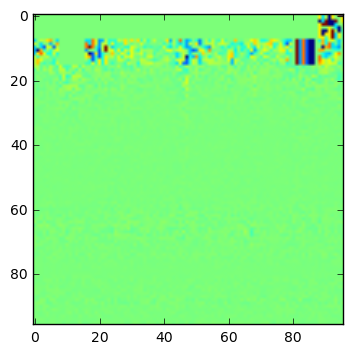

In [38]:
plt.imshow(meanNorm)

In [39]:
#As a test i try to clasify the data using a SVM (support vector machine) of the sklearn package 

from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf = SVC()


clf.fit(flattenDataset, fTrainLabels) 
pred = clf.predict(flatTest)
print classification_report(fTestLabels, pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        30
          1       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00        90

